In [1]:
#Import Libraries
import os
import numpy as np
import pandas as pd
from prettytable import PrettyTable
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from random import randint
import random
from sklearn.ensemble import RandomForestClassifier


In [2]:
#Import Dataset 
DATA_DIR = os.path.join('..','CW','we_data')
data_path = {'train': os.path.join(DATA_DIR, 'train.csv'),
             'validation': os.path.join(DATA_DIR, 'validation.csv'),
            'test': os.path.join(DATA_DIR, 'test.csv'),
            'group_xx': os.path.join(DATA_DIR, 'Group_xx.csv')}
 
train = pd.read_csv(data_path['train'])
validation = pd.read_csv(data_path['validation'])
test = pd.read_csv(data_path['test'])
group_xx = pd.read_csv(data_path['group_xx'])


In [3]:
def encode_days(df):
    df = pd.concat([df,pd.get_dummies(df.weekday,prefix='day')],axis=1)
    df = df.drop('weekday',axis=1)
    return df
 
def encode_hours(df):
    df = pd.concat([df,pd.get_dummies(df.hour,prefix='hour')],axis=1)
    df = df.drop('hour',axis=1)
    
    return df
 
def encode_region(df):
    df = pd.concat([df,pd.get_dummies(df.region,prefix='region')],axis=1)
    df = df.drop('region',axis=1)
    return df
 
def encode_adexchange(df):
    df = pd.concat([df,pd.get_dummies(df.adexchange,prefix='adexchange')],axis=1)
    df = df.drop('adexchange',axis=1)
    return df
 
def encode_slotwidth(df):
    df = pd.concat([df,pd.get_dummies(df.slotwidth,prefix='slotwidth')],axis=1)
    df = df.drop('slotwidth',axis=1)
    return df
 
def encode_slotheight(df):
    df = pd.concat([df,pd.get_dummies(df.slotheight,prefix='slotheight')],axis=1)
    df = df.drop('slotheight',axis=1)
    return df
 
def encode_advertiser(df):
    df = pd.concat([df,pd.get_dummies(df.advertiser,prefix='advertiser')],axis=1)
    df = df.drop('advertiser',axis=1)
    return df
 
def encode_slotvisibility(df):
    df = pd.concat([df,pd.get_dummies(df.slotvisibility,prefix='slotvisibility')],axis=1)
    df = df.drop('slotvisibility',axis=1)
    return df
 
def encode_slotformat(df):
    df = pd.concat([df,pd.get_dummies(df.slotformat,prefix='slotformat')],axis=1)
    df = df.drop('slotformat',axis=1)
    return df
 
def encode_os_browser(df):
    df_temp = pd.df(df.useragent.str.split('_',1).tolist(), columns = ['OS','browser'])
    df = pd.concat([df,df_temp],axis=1)
    df = df.drop('useragent',axis=1)
    df = pd.concat([df,pd.get_dummies(df.OS,prefix='OS')],axis=1)
    df = df.drop('OS',axis=1)
    df = pd.concat([df,pd.get_dummies(df.browser,prefix='browser')],axis=1)
    df = df.drop('browser',axis=1)
    return df
 
def encode_slotprice(df):
    slotprice_range = pd.df()
    slotprice_range['slotprices'] = pd.cut(df.slotprice.values,5, labels=[1,2,3,4,5])
    df = pd.concat([df,slotprice_range],axis=1)
    df = pd.concat([df,pd.get_dummies(df.slotprices,prefix='slotprice')],axis=1)
    df = df.drop('slotprice',axis=1)
    df = df.drop('slotprices',axis=1)
    return df
 

xtrain = train.drop(['click','bidid','usertag','userid','IP','city','domain', 'url','urlid','slotid','creative','bidprice','payprice','keypage'], axis=1)
ytrain = train.click

xval = validation.drop(['click','bidid', 'usertag','userid','IP','city','domain', 'url','urlid','slotid','creative','bidprice','payprice','keypage'], axis=1)
yval = validation.click


xtest = test.drop(['bidid','userid','IP','usertag','city','domain', 'url','urlid','slotid','creative','keypage'], axis=1)
xtrain = encode_adexchange(xtrain)
xtrain = encode_advertiser(xtrain)
xtrain = encode_days(xtrain)
xtrain = encode_hours(xtrain)
xtrain = encode_os_browser(xtrain)
xtrain = encode_region(xtrain)
xtrain = encode_slotformat(xtrain)
xtrain = encode_slotheight(xtrain)
xtrain = encode_slotprice(xtrain)
xtrain = encode_slotvisibility(xtrain)
xtrain = encode_slotwidth(xtrain)

xtrain.head()

,adexchange_1.0,adexchange_2.0,adexchange_3.0,adexchange_4.0,advertiser_1458,advertiser_2259,advertiser_2261,advertiser_2821,advertiser_2997,advertiser_3358,...,slotwidth_468,slotwidth_620,slotwidth_640,slotwidth_728,slotwidth_760,slotwidth_910,slotwidth_950,slotwidth_960,slotwidth_980,slotwidth_1000
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [4]:
xval = encode_adexchange(xval)
xval = encode_advertiser(xval)
xval = encode_days(xval)
xval = encode_hours(xval)
xval = encode_os_browser(xval)
xval = encode_region(xval)
xval = encode_slotformat(xval)
xval = encode_slotheight(xval)
xval = encode_slotprice(xval)
xval = encode_slotvisibility(xval)
xval = encode_slotwidth(xval)

xval.head()

,adexchange_1.0,adexchange_2.0,adexchange_3.0,adexchange_4.0,advertiser_1458,advertiser_2259,advertiser_2261,advertiser_2821,advertiser_2997,advertiser_3358,...,slotwidth_468,slotwidth_620,slotwidth_640,slotwidth_728,slotwidth_760,slotwidth_910,slotwidth_950,slotwidth_960,slotwidth_980,slotwidth_1000
0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303925 entries, 0 to 303924
Data columns (total 25 columns):
click             303925 non-null int64
weekday           303925 non-null int64
hour              303925 non-null int64
bidid             303925 non-null object
userid            303925 non-null object
useragent         303925 non-null object
IP                303925 non-null object
region            303925 non-null int64
city              303925 non-null int64
adexchange        297749 non-null float64
domain            286993 non-null object
url               293075 non-null object
urlid             0 non-null float64
slotid            303925 non-null object
slotwidth         303925 non-null int64
slotheight        303925 non-null int64
slotvisibility    303925 non-null object
slotformat        303925 non-null object
slotprice         303925 non-null int64
creative          303925 non-null object
bidprice          303925 non-null int64
payprice          303925 non-null int64


In [6]:
xtest = encode_adexchange(xtest)
xtest = encode_advertiser(xtest)
xtest = encode_days(xtest)
xtest = encode_hours(xtest)
xtest = encode_os_browser(xtest)
xtest = encode_region(xtest)
xtest = encode_slotformat(xtest)
xtest = encode_slotheight(xtest)
xtest = encode_slotprice(xtest)
xtest = encode_slotvisibility(xtest)
xtest = encode_slotwidth(xtest)

xtest.head()

,adexchange_1.0,adexchange_2.0,adexchange_3.0,adexchange_4.0,advertiser_1458,advertiser_2259,advertiser_2261,advertiser_2821,advertiser_2997,advertiser_3358,...,slotwidth_468,slotwidth_620,slotwidth_640,slotwidth_728,slotwidth_760,slotwidth_910,slotwidth_950,slotwidth_960,slotwidth_980,slotwidth_1000
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:

import xgboost as xgb
#df.sort_index(axis=1, inplace=True)
from sklearn.ensemble import RandomForestClassifier
 
model = RandomForestClassifier( n_estimators = 300,  max_features = "auto", min_samples_leaf = 50, class_weight = "balanced")
#model = xgb.XGBClassifier(learning_rate=0.2, max_depth=3, n_estimators=200)
    
    # train model
    #model.fit(features, labels)
    
    
    #accuracy = model.score(features, labels)


#model = RandomForestClassifier(n_jobs = -1, n_estimators = 300, random_state =100, max_features = "auto", min_samples_leaf = 50, class_weight = "balanced")
 
resultval = model.fit(xtrain, ytrain).predict(xval)


 
#run on test set
#resulttest = model.fit(xtrain, ytrain).predict(xtest)
 


In [8]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2430981 entries, 0 to 2430980
Columns: 149 entries, adexchange_1.0 to slotwidth_1000
dtypes: uint8(149)
memory usage: 345.4 MB


In [9]:
predprob = model.predict_proba(xval)

pCTRval = pd.DataFrame(predprob)
pCTRval.head()

,0,1
0,0.847962,0.152038
1,0.871353,0.128647
2,0.905454,0.094546
3,0.850247,0.149753
4,0.986924,0.013076


In [204]:
from sklearn import metrics
fprR, tprR, thresholds = metrics.roc_curve(validation.click, pCTRval[1])
metrics.auc(fprR, tprR)

auc = 'Random Forest Classifier AUC = %.5f' % metrics.auc(fprR, tprR)
mse = 'Random Forest Classifier MSE = %.5f' % metrics.mean_squared_error(fprR, tprR)
(auc, mse)

('Random Forest Classifier AUC = 0.71063',
 'Random Forest Classifier MSE = 0.05265')

In [11]:
import xgboost as xgb
#df.sort_index(axis=1, inplace=True)
#from sklearn.ensemble import RandomForestClassifier
 
from sklearn.linear_model import LogisticRegression

model2 = LogisticRegression(penalty='l2', dual=False, tol=0.0001, 
C=1.0,fit_intercept=True,intercept_scaling=1,class_weight='balanced',random_state=None,solver='liblinear', 
                          max_iter=100,multi_class='ovr', 
                          verbose=0, 
                          warm_start=False, 
                          n_jobs=1)

resultval = model2.fit(xtrain, ytrain).predict(xval)

In [220]:
from sklearn.ensemble import GradientBoostingClassifier

model3 = GradientBoostingClassifier()
#model3 = LogisticRegression(penalty='l2')

resultval3 = model3.fit(xtrain, ytrain).predict(xval)

In [221]:
predprob3 = model3.predict_proba(xval)
pCTRval3 = pd.DataFrame(predprob3)
fprG, tprG, thresholds = metrics.roc_curve(validation.click, pCTRval3[1])
metrics.auc(fprG, tprG)

0.7365283302858392

In [232]:
predprob2 = model2.predict_proba(xval)
pCTRval2 = pd.DataFrame(predprob2)
fprL, tprL, thresholds = metrics.roc_curve(validation.click, pCTRval2[1])
metrics.auc(fpr, tpr)
aucR = 'Random Forest Classifier AUC = %.5f' % metrics.auc(fprR, tprR)
mseR = 'Random Forest Classifier MSE = %.5f' % metrics.mean_squared_error(fprR, tprR)
aucL = 'Logistic Regression AUC = %.5f' % metrics.auc(fprL, tprL)
mseL = 'Logistic Regression MSE = %.5f' % metrics.mean_squared_error(fprL, tprL)
aucG = 'Gradient Boosting Classifier AUC = %.5f' % metrics.auc(fprG, tprG)
mseG = 'Gradient Boosting Classifier MSE = %.5f' % metrics.mean_squared_error(fprG, tprG)

(aucL, aucR, aucG, mseL, mseR, mseG )

('Logistic Regression AUC = 0.73256',
 'Random Forest Classifier AUC = 0.71063',
 'Gradient Boosting Classifier AUC = 0.73653',
 'Logistic Regression MSE = 0.06667',
 'Random Forest Classifier MSE = 0.05265',
 'Gradient Boosting Classifier MSE = 0.06015')

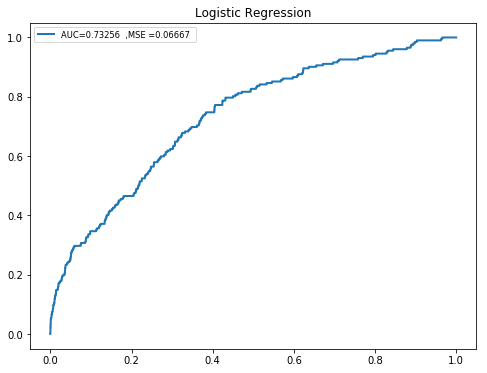

In [70]:
f, axes = plt.subplots(1, figsize=(8, 6))
lab = 'AUC=%.5f  ,MSE =%.5f ' % (metrics.auc(fpr, tpr), metrics.mean_squared_error(fpr, tpr))
axes.step(fpr, tpr, lw=2,label=lab)

axes.legend(loc='upper left', fontsize='small')
plt.title("Logistic Regression")
plt.show()

In [14]:
pctrval = []
pctrtest = []

for pctr in pCTRval[1]:
    pctrval.append( pctr / 1000)



In [51]:
pctrval = pd.DataFrame(pctrval)
pctrval.to_csv('pCTRval_lo.csv')
pctrval.head()

,Unnamed: 0,0
0,0,0.000152
1,1,0.000129
2,2,0.000095
3,3,0.000150
4,4,0.000013


In [225]:
pctrval1 = pd.read_csv('pCTRval.csv')
average_ctr = validation.click.sum() / validation.bidid.count()
pctrval_list1 = list(pctrval1['0'])

In [226]:
def linear_bidding(pctrval_list):
    bids = []
    max_bid = 300
    for bid in range(10, max_bid+10, 10):
        for pctr in pctrval_list:
            bids.append(bid * pctr / average_ctr)

    bid_groups = [bids[x:x+len(pctrval)] for x in range(0, len(bids), len(pctrval))]
    return bid_groups

In [245]:
def data(df, pctrVal):
    df_data = pd.DataFrame(columns=['bid', 'imps','clicks','spent','CTR','CPC','CPM'])
    lists = {'bid':[],  'imps':[], 'spent':[], 'clicks':[],'ctr':[], 'cpc':[], 'cpm':[]}
    pctrval_list = pctrVal
    bid_groups = linear_bidding1(pctrval_list)

    maxi = 0
    maxv = -1
    for group in range(0,len(bid_groups)):
        budget = 6250.0
        spent = 0
        clicks = 0
        imps = 0
        bid = bid_groups[group]
        check = bid >= validation.payprice
        for i in range(0,len(check)):
            payprice = validation.payprice[i]
            if budget < payprice:
                break
            if check[i]:
                imps = imps + 1
                clicks = clicks + validation.click[i]
                budget = budget - payprice
                spent = spent + payprice
        spent = spent / 1000
        ctr = ((clicks / imps) * 100)
        cpm = ((spent / imps) * 1000)
        cpc = (spent / clicks)
        if ctr * clicks > maxv:
            maxv = ctr * clicks
            maxi = group
        lists['bid'] = range(10, 310, 10)
        lists['clicks'].append(clicks)
        lists['imps'].append(imps)
        lists['spent'].append(spent)
        lists['ctr'].append(ctr)
        lists['cpc'].append(cpc)
        lists['cpm'].append(cpm)
    return df_data

In [228]:
def data_result():
    data(df_data, pctrval_list).bid = lists['bid']
    data(df_data, pctrval_list).clicks = lists['clicks']
    data(df_data, pctrval_list).imps = lists['imps']
    data(df_data, pctrval_list).spent = lists['spent']
    data(df_data, pctrval_list).CTR = lists['ctr']
    data(df_data, pctrval_list).CPC = lists['cpc']
    data(df_data, pctrval_list).CPM = lists['cpm']
    return data(df_data, pctrval_list)
    data(df_data, pctrval_list)

,bid,imps,clicks,spent,CTR,CPC,CPM
0,10,82,0,0.0,0.0,NaN,0.0
1,20,82,0,0.0,0.0,NaN,0.0
2,30,82,0,0.0,0.0,NaN,0.0
3,40,82,0,0.0,0.0,NaN,0.0
4,50,82,0,0.0,0.0,NaN,0.0
5,60,82,0,0.0,0.0,NaN,0.0
6,70,82,0,0.0,0.0,NaN,0.0
7,80,82,0,0.0,0.0,NaN,0.0
8,90,82,0,0.0,0.0,NaN,0.0
9,100,82,0,0.0,0.0,NaN,0.0


In [ ]:
linear_bidding1(pctrval_list1)
def data_result():
    data(df_data, pctrval_list).bid = lists['bid']
    data(df_data, pctrval_list).clicks = lists['clicks']
    data(df_data, pctrval_list).imps = lists['imps']
    data(df_data, pctrval_list).spent = lists['spent']
    data(df_data, pctrval_list).CTR = lists['ctr']
    data(df_data, pctrval_list).CPC = lists['cpc']
    data(df_data, pctrval_list).CPM = lists['cpm']
    return data(df_data, pctrval_list)

In [214]:
data(df_data, pctrval_list)

,bid,imps,clicks,spent,CTR,CPC,CPM
0,10,6331,4,32.365,0.063181,8.091250,5.112147
1,20,17855,5,146.134,0.028003,29.226800,8.184486
2,30,31060,12,373.260,0.038635,31.105000,12.017386
3,40,45587,22,693.253,0.048259,31.511500,15.207252
4,50,60474,30,1105.595,0.049608,36.853167,18.282154
5,60,73951,37,1570.113,0.050033,42.435486,21.231802
6,70,88971,49,2260.923,0.055074,46.141286,25.411909
7,80,108137,64,3340.583,0.059184,52.196609,30.892137
8,90,130238,85,4725.727,0.065265,55.596788,36.285316
9,100,151709,107,6148.348,0.070530,57.461196,40.527246


In [215]:
df_data.iloc[np.where(df_data.clicks == df_data.clicks.max())[0]]

,bid,imps,clicks,spent,CTR,CPC,CPM
9,100,151709,107,6148.348,0.07053,57.461196,40.527246


In [ ]:
pctrval = pd.read_csv('pCTRval.csv')
average_ctr = validation.click.sum() / validation.bidid.count()
pctrval_list = list(pctrval['0'])

In [238]:
linear_bidding1(pctrval_list1)
def data_result():
    data(df_data, pctrval_list).bid = lists['bid']
    data(df_data, pctrval_list).clicks = lists['clicks']
    data(df_data, pctrval_list).imps = lists['imps']
    data(df_data, pctrval_list).spent = lists['spent']
    data(df_data, pctrval_list).CTR = lists['ctr']
    data(df_data, pctrval_list).CPC = lists['cpc']
    data(df_data, pctrval_list).CPM = lists['cpm']
    return data(df_data, pctrval_list)

In [243]:
data(df_data, pctrval_list)

,bid,imps,clicks,spent,CTR,CPC,CPM
0,10,1394,4,6.828,0.286944,1.707000,4.898135
1,20,3494,4,24.252,0.114482,6.063000,6.941042
2,30,6534,5,61.209,0.076523,12.241800,9.367769
3,40,9838,8,109.334,0.081317,13.666750,11.113438
4,50,13389,12,170.834,0.089626,14.236167,12.759280
5,60,17137,19,247.615,0.110871,13.032368,14.449145
6,70,20710,23,333.326,0.111057,14.492435,16.094930
7,80,24696,28,458.006,0.113379,16.357357,18.545756
8,90,28903,31,604.579,0.107255,19.502548,20.917517
9,100,33530,35,785.041,0.104384,22.429743,23.413093


In [244]:
df_data.iloc[np.where(df_data.clicks == df_data.clicks.max())[0]]

,bid,imps,clicks,spent,CTR,CPC,CPM
29,300,125663,113,6076.957,0.089923,53.778381,48.359159


In [184]:
df = pd.DataFrame()
df['bids'] = linear_bidding(pctrval_list)
df_valortb = pd.concat([validation, df], axis=1)
df_valortb

,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,...,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag,bids
0,0,4,20,bbcb813b6166538503d8b33a5602d7d72f6019dc,663169f66491c98c69f1f94a5c48fa34aa9fe06f,windows_ie,211.144.203.*,79,79,1.0,...,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,23,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10111","[2.287530488406917, 1.9355945959048673, 1.4225..."
1,0,1,21,5a07316c49477cb5d9b4d5aa39c27d6c3be7f92d,a23f0cfab6592c137f796e68fa752fceba08bb1b,windows_chrome,58.247.250.*,79,79,1.0,...,0,1,0,c938195f9e404b4f38c7e71bf50263e5,238,75,a3becb967c015e9acb5e72f22b100ef8,3476,"10075,10057,10024,10052,10083,10063,10006,10110","[4.575060976813834, 3.8711891918097345, 2.8450..."
2,0,4,8,f6ece71dae81d6b16bfb24ad6dd5611472d4c673,5105a013ea54a9706146033e6a138d5234a3803e,windows_ie,117.12.111.*,2,2,2.0,...,2,0,5,911b2d84826786018761e8c0b0a3a60c,238,65,d29e59bf0f7f8243858b8183f14d4412,3358,"13866,10024,10059,10063,13776,10083,10006,10111","[6.862591465220751, 5.806783787714602, 4.26756..."
3,0,5,15,b4d5c57c9b38ff5a12954fa01e11931b4e6bfbbb,577e9a768ce17e73c61ba7022db927f9ee761830,windows_chrome,61.187.224.*,201,205,2.0,...,2,0,5,dc0998c10f8f0b623b5d949e8272e4c7,238,6,d29e59bf0f7f8243858b8183f14d4412,3358,"13866,10057,10006,10063,10110","[9.150121953627668, 7.742378383619469, 5.69008..."
4,0,1,18,0899bf144249458ea9c89188473694bf44c7ca15,e4bf79c562745d671b19f2edf7fda89c2e25987f,windows_chrome,117.41.145.*,134,135,2.0,...,1,0,5,23485fcd23122d755d38f8c89d46ca56,249,5,7e0e909ea89f707bc20f9585c9072081,3476,"10006,10063,13776,10110","[11.437652442034585, 9.677972979524338, 7.1126..."
5,0,6,1,f4c6a9a3b1db6da035c7e2a36d4f5e389095beca,5d3f7a140423324201f980609348422b7b9d2ba8,windows_ie,101.23.72.*,3,3,3.0,...,0,0,20,3d8f1161832704a1a34e1ccdda11a81e,241,22,b2e35064f3549d447edbbdfb1f707c8c,3427,"10063,10111","[13.725182930441502, 11.613567575429204, 8.535..."
6,0,0,18,786a2940f225482dc04d455dc7a7fea436b02e03,d29c0eb9c94d4225736a15324000b9424518abad,windows_ie,183.131.142.*,94,97,1.0,...,0,1,0,13606a7c541dcd9ca1948875a760bb31,227,31,d29e59bf0f7f8243858b8183f14d4412,3358,"10006,10110","[16.01271341884842, 13.549162171334071, 9.9576..."
7,0,6,21,17ada861c6ed0616f88312ba0d3d76c0f95b4940,1c2afa6805a0987cd98be4212fcde0f43ea2bdaa,windows_ie,116.252.192.*,238,239,1.0,...,2,1,0,00fccc64a1ee2809348509b7ac2a97a5,227,20,b2e35064f3549d447edbbdfb1f707c8c,3427,NaN,"[18.300243907255336, 15.484756767238938, 11.38..."
8,0,0,11,6abd8ef3eb678b1afe67dc0cff0aa58413fbf29a,391c06ba8398e249d5c6e370a0ea9d1245ae9b29,windows_chrome,114.226.234.*,80,84,2.0,...,2,0,5,f65c8bdb41e9015970bac52baa813239,249,58,9be83422522025c09a44593ecd1af8ca,3476,"10057,10063,10006,10059,10110","[20.587774395662255, 17.420351363143805, 12.80..."
9,0,5,15,442ffca310e325abc255e8ff97d9812051336acd,e7b2e7f694f4fe57a467fc3879ce4562c797edb4,windows_ie,222.172.73.*,65,73,3.0,...,0,0,50,a10c31a8ff5f42930b4c34035e523886,241,55,d29e59bf0f7f8243858b8183f14d4412,3358,"10048,10059,10006,13403,10063,10031,10111","[22.87530488406917, 19.355945959048675, 14.225..."


In [229]:
def ortb_bidding(pctrval_list):
    bids = []
    c = 16
    l = 5e-07
    
    for pctr in pctrval_list:
        bids.append(np.sqrt(((c/l)*pctr)+(c*c)-c))
    
    return bids

In [230]:
df_ortb = pd.DataFrame()
df_ortb['bids'] = ortb_bidding(pctrval_list)
df_valortb = pd.concat([validation, df_ortb], axis=1)
df_valortb


,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,...,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag,bids
0,0,4,20,bbcb813b6166538503d8b33a5602d7d72f6019dc,663169f66491c98c69f1f94a5c48fa34aa9fe06f,windows_ie,211.144.203.*,79,79,1.0,...,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,23,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10111",71.450770
1,0,1,21,5a07316c49477cb5d9b4d5aa39c27d6c3be7f92d,a23f0cfab6592c137f796e68fa752fceba08bb1b,windows_chrome,58.247.250.*,79,79,1.0,...,0,1,0,c938195f9e404b4f38c7e71bf50263e5,238,75,a3becb967c015e9acb5e72f22b100ef8,3476,"10075,10057,10024,10052,10083,10063,10006,10110",66.005310
2,0,4,8,f6ece71dae81d6b16bfb24ad6dd5611472d4c673,5105a013ea54a9706146033e6a138d5234a3803e,windows_ie,117.12.111.*,2,2,2.0,...,2,0,5,911b2d84826786018761e8c0b0a3a60c,238,65,d29e59bf0f7f8243858b8183f14d4412,3358,"13866,10024,10059,10063,13776,10083,10006,10111",57.144333
3,0,5,15,b4d5c57c9b38ff5a12954fa01e11931b4e6bfbbb,577e9a768ce17e73c61ba7022db927f9ee761830,windows_chrome,61.187.224.*,201,205,2.0,...,2,0,5,dc0998c10f8f0b623b5d949e8272e4c7,238,6,d29e59bf0f7f8243858b8183f14d4412,3358,"13866,10057,10006,10063,10110",70.937274
4,0,1,18,0899bf144249458ea9c89188473694bf44c7ca15,e4bf79c562745d671b19f2edf7fda89c2e25987f,windows_chrome,117.41.145.*,134,135,2.0,...,1,0,5,23485fcd23122d755d38f8c89d46ca56,249,5,7e0e909ea89f707bc20f9585c9072081,3476,"10006,10063,13776,10110",25.659896
5,0,6,1,f4c6a9a3b1db6da035c7e2a36d4f5e389095beca,5d3f7a140423324201f980609348422b7b9d2ba8,windows_ie,101.23.72.*,3,3,3.0,...,0,0,20,3d8f1161832704a1a34e1ccdda11a81e,241,22,b2e35064f3549d447edbbdfb1f707c8c,3427,"10063,10111",60.490534
6,0,0,18,786a2940f225482dc04d455dc7a7fea436b02e03,d29c0eb9c94d4225736a15324000b9424518abad,windows_ie,183.131.142.*,94,97,1.0,...,0,1,0,13606a7c541dcd9ca1948875a760bb31,227,31,d29e59bf0f7f8243858b8183f14d4412,3358,"10006,10110",69.952077
7,0,6,21,17ada861c6ed0616f88312ba0d3d76c0f95b4940,1c2afa6805a0987cd98be4212fcde0f43ea2bdaa,windows_ie,116.252.192.*,238,239,1.0,...,2,1,0,00fccc64a1ee2809348509b7ac2a97a5,227,20,b2e35064f3549d447edbbdfb1f707c8c,3427,NaN,52.402122
8,0,0,11,6abd8ef3eb678b1afe67dc0cff0aa58413fbf29a,391c06ba8398e249d5c6e370a0ea9d1245ae9b29,windows_chrome,114.226.234.*,80,84,2.0,...,2,0,5,f65c8bdb41e9015970bac52baa813239,249,58,9be83422522025c09a44593ecd1af8ca,3476,"10057,10063,10006,10059,10110",72.317108
9,0,5,15,442ffca310e325abc255e8ff97d9812051336acd,e7b2e7f694f4fe57a467fc3879ce4562c797edb4,windows_ie,222.172.73.*,65,73,3.0,...,0,0,50,a10c31a8ff5f42930b4c34035e523886,241,55,d29e59bf0f7f8243858b8183f14d4412,3358,"10048,10059,10006,13403,10063,10031,10111",53.164349


In [231]:
df = pd.DataFrame(columns=['clicks','imps','spent','CTR','CPC','CPM'])
lists = {'clicks':[], 'imps':[], 'spent':[], 'ctr':[], 'cpc':[], 'cpm':[]}

budget = 6250000.0
imps = 0
clicks = 0
spent = 0
for i in range(0,len(df_valortb)):
    payprice = df_valortb.payprice[i]
    bid = df_valortb.bids[i]
    if budget < payprice:
        break
    if bid >= payprice:
        imps = imps + 1
        clicks = clicks + df_valortb.click[i]
        budget = budget - payprice
        spent = spent + payprice
spent = spent / 1000
ctr = ((clicks / imps) * 100).round(4).astype(str)
cpm = ((spent / imps) * 1000).round(4).astype(str)
cpc = (spent / clicks).round(4).astype(str)
lists['clicks'].append(clicks)
lists['imps'].append(imps)
lists['spent'].append(spent)
lists['ctr'].append(ctr)
lists['cpc'].append(cpc)
lists['cpm'].append(cpm)

df.clicks = lists['clicks']
df.imps = lists['imps']
df.spent = lists['spent']
df.CTR = lists['ctr']
df.CPC = lists['cpc']
df.CPM = lists['cpm']
df

,clicks,imps,spent,CTR,CPC,CPM
0,106,151655,6171.699,0.0699,58.2236,40.6957
